In [4]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Importing the dataset
dataset = pd.read_csv('data/Mall_Customers.csv')

In [6]:
#fetch the columns (area of interest)
X = dataset.iloc[:,[3,4]].values

In [7]:
#Elbow method to find optimal number of clusters for the dataset
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) 

C:\Users\prtk1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


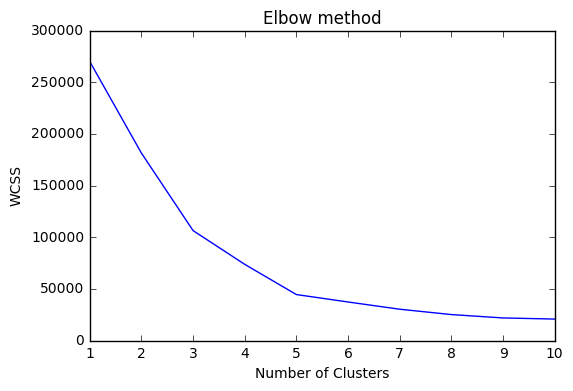

In [8]:
#plot line graph to determine elbow point
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

In [9]:
#Apply kmeans for optimal number of cluster
kmeans = KMeans(n_clusters=5, max_iter=300, n_init=10, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

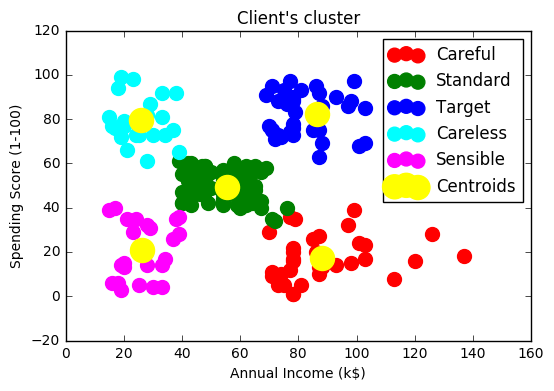

In [10]:
#Visualizing the clusters
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, color='red', label='Careful')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, color='green', label='Standard')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, color='blue', label='Target')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, color='cyan', label='Careless')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=100, color='magenta', label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, color='yellow', label='Centroids')
plt.title('Client\'s cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()